In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 读取数据
data = pd.read_csv(r"D:\大学\大三\大三上\数据挖掘\作业\大作业\pythonProject\carbon.csv", parse_dates=['date'], index_col='date')

# 检查数据的前几行
print(data.head())

# 查看列名，确保目标变量名正确
print(data.columns)


            state       sector  MtCO2 per day
date                                         
2020-01-01  Anhui     Industry       0.357394
2020-01-01  Anhui     Aviation       0.010020
2020-01-01  Anhui  Residential       0.009607
2020-01-01  Anhui        Power       0.534373
2020-01-02  Anhui     Industry       0.343364
Index(['state', 'sector', 'MtCO2 per day'], dtype='object')


In [2]:
# ADF 检验
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("时间序列是平稳的")
    else:
        print("时间序列是非平稳的")

# 选择一个具体的 "state" 和 "sector" 进行检验（以 'Anhui' 和 'Industry' 为例）
selected_data = data[(data['state'] == 'Anhui') & (data['sector'] == 'Industry')]

# 执行 ADF 检验
adf_test(selected_data['MtCO2 per day'])


ADF Statistic: -6.583100924878345
p-value: 7.4290911981211585e-09
时间序列是平稳的


In [3]:
# 检查缺失值
print(selected_data.isnull().sum())

# 使用前向填充法填充缺失值
selected_data['MtCO2 per day'].fillna(method='ffill', inplace=True)


state            0
sector           0
MtCO2 per day    0
dtype: int64


D:\Users\86130\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [4]:
# 计算各部分大小
train_size = int(len(selected_data) * 0.6)
val_size = int(len(selected_data) * 0.2)
test_size = len(selected_data) - train_size - val_size

# 拆分数据集
train, val, test = selected_data[:train_size], selected_data[train_size:train_size+val_size], selected_data[train_size+val_size:]

print(f"Training data size: {len(train)}")
print(f"Validation data size: {len(val)}")
print(f"Testing data size: {len(test)}")


Training data size: 1039
Validation data size: 346
Testing data size: 348


In [5]:
# 对训练集、验证集和测试集进行差分处理
train_diff = train['MtCO2 per day'].diff().dropna()
val_diff = val['MtCO2 per day'].diff().dropna()
test_diff = test['MtCO2 per day'].diff().dropna()

# 进行 ADF 检验
print("ADF 检验 - Training data")
adf_test(train_diff)

print("ADF 检验 - Validation data")
adf_test(val_diff)

print("ADF 检验 - Testing data")
adf_test(test_diff)


ADF 检验 - Training data
ADF Statistic: -22.84351763257189
p-value: 0.0
时间序列是平稳的
ADF 检验 - Validation data
ADF Statistic: -18.25060008452801
p-value: 2.343393409174231e-30
时间序列是平稳的
ADF 检验 - Testing data
ADF Statistic: -17.47129594154772
p-value: 4.541229655130518e-30
时间序列是平稳的


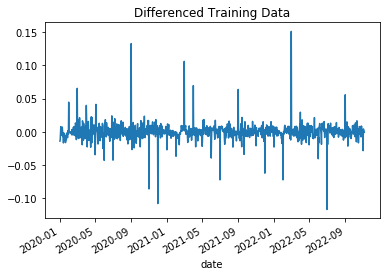

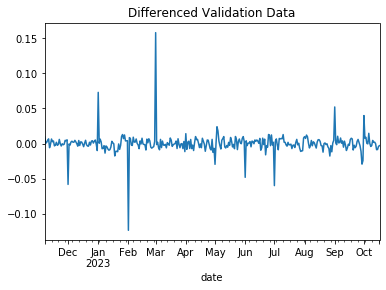

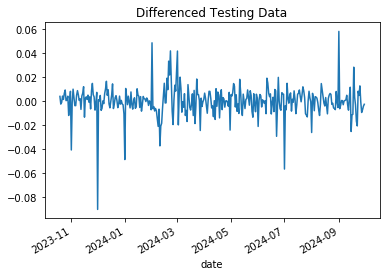

In [6]:
# 绘制差分后的数据
train_diff.plot(title='Differenced Training Data')
plt.show()

val_diff.plot(title='Differenced Validation Data')
plt.show()

test_diff.plot(title='Differenced Testing Data')
plt.show()


In [7]:
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # 选择数据集中的目标省份和领域
# def select_data(state, sector, data):
#     return data[(data['state'] == state) & (data['sector'] == sector)]['MtCO2 per day']

# # 拟合 ARIMA 模型并进行预测
# def fit_arima_model(series, order=(1, 1, 1), forecast_days=30):
#     # 拟合 ARIMA 模型
#     model = ARIMA(series, order=order)
#     model_fit = model.fit()

#     # 对未来进行预测
#     forecast = model_fit.forecast(steps=forecast_days)
    
#     # 计算预测值的拟合误差
#     predictions = model_fit.predict(start=0, end=len(series)-1, typ='levels')

#     # 计算误差指标（MAE, MSE, RMSE）
#     mae = mean_absolute_error(series[-len(forecast):], forecast)
#     mse = mean_squared_error(series[-len(forecast):], forecast)
#     rmse = np.sqrt(mse)

#     return model_fit, forecast, mae, mse, rmse, predictions

# # 绘制模型拟合和预测结果
# def plot_results(actual, predicted, forecast, forecast_days):
#     plt.figure(figsize=(10, 6))
#     plt.plot(actual, label='Actual Data')
#     plt.plot(predicted, label='Fitted Data', color='orange')
#     plt.plot(range(len(actual), len(actual) + forecast_days), forecast, label='Forecast', color='red', linestyle='--')
#     plt.title('ARIMA Model Fit and Forecast')
#     plt.legend(loc='best')
#     plt.show()


In [8]:
# import streamlit as st

# # Streamlit 页面设置
# st.title("碳排放量预测")

# # 选择省份
# state = st.selectbox("选择省份", data['state'].unique())

# # 选择领域
# sector = st.selectbox("选择领域", data['sector'].unique())

# # 选择预测天数
# forecast_days = st.slider("选择预测天数", min_value=1, max_value=30, value=7)

# # 按钮点击事件
# if st.button('预测并展示结果'):
#     # 获取所选省份和领域的数据
#     selected_data = select_data(state, sector, data)

#     if len(selected_data) < 30:
#         st.warning("数据量不足以进行预测，请选择更长时间的数据")
#     else:
#         # 拟合 ARIMA 模型并进行预测
#         model_fit, forecast, mae, mse, rmse, predictions = fit_arima_model(selected_data, forecast_days=forecast_days)

#         # 显示拟合误差指标
#         st.subheader("模型拟合评估指标")
#         st.write(f"均方误差(MSE): {mse:.2f}")
#         st.write(f"均方根误差(RMSE): {rmse:.2f}")
#         st.write(f"平均绝对误差(MAE): {mae:.2f}")

#         # 绘制结果
#         st.subheader("ARIMA 模型拟合与预测图")
#         plot_results(selected_data, predictions, forecast, forecast_days)

#         # 显示预测结果
#         st.subheader("未来几天的预测碳排放量")
#         forecast_df = pd.DataFrame(forecast, columns=["预测值"])
#         st.write(forecast_df)


In [9]:
#!streamlit run carbon_forecast.py


In [1]:
import pandas as pd

file_path = r"D:\大学\大三\大三上\数据挖掘\作业\大作业\DM_carbon(1)\datasets\carbon.csv"
carbon_data = pd.read_csv(file_path)

carbon_data.head()


,state,date,sector,MtCO2 per day
0,Anhui,2020-01-01,Industry,0.357394
1,Anhui,2020-01-01,Aviation,0.010020
2,Anhui,2020-01-01,Residential,0.009607
3,Anhui,2020-01-01,Power,0.534373
4,Anhui,2020-01-02,Industry,0.343364


In [2]:
# 预处理步骤

# 1. 检查缺失值
missing_values = carbon_data.isnull().sum()

# 2. 确认日期格式是否正确，并将其转换为日期时间格式
carbon_data['date'] = pd.to_datetime(carbon_data['date'])

# 3. 检查数据集中的省份和领域是否具有正确的数据类型
states_unique = carbon_data['state'].unique()
sectors_unique = carbon_data['sector'].unique()

# 4. 确保所有省份和领域的名称都是规范的，没有拼写错误或多余的空格
# 对省份和领域进行规范化处理，去除多余的空格并转换为标题格式
carbon_data['state'] = carbon_data['state'].str.strip().str.title()
carbon_data['sector'] = carbon_data['sector'].str.strip().str.title()

# 显示处理后的数据集的前几行以及缺失值和省份、领域的唯一值
processed_data_head = carbon_data.head()
missing_values, states_unique, sectors_unique, processed_data_head


(state            0
 date             2
 sector           2
 MtCO2 per day    2
 dtype: int64,
 array(['Anhui', 'Beijing', 'Chongqing', 'December 1st, 2024', 'Fujian',
        'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
        'Heilongjiang', 'Henan', 'Hubei', 'Hunan', 'Inner Mongolia',
        'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Ningxia', 'Qinghai',
        'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
        'Xinjiang', 'Yunnan', 'Zhejiang'], dtype=object),
 array(['Industry', 'Aviation', 'Residential', 'Power', 'Ground Transport',
        nan], dtype=object),
    state       date       sector  MtCO2 per day
 0  Anhui 2020-01-01     Industry       0.357394
 1  Anhui 2020-01-01     Aviation       0.010020
 2  Anhui 2020-01-01  Residential       0.009607
 3  Anhui 2020-01-01        Power       0.534373
 4  Anhui 2020-01-02     Industry       0.343364)

In [3]:
# 删除包含缺失值的行
carbon_data_cleaned = carbon_data.dropna()

# 再次检查数据集的基本信息和缺失值
cleaned_data_info = carbon_data_cleaned.info()
cleaned_data_head = carbon_data_cleaned.head()
missing_values_cleaned = carbon_data_cleaned.isnull().sum()

cleaned_data_info, cleaned_data_head, missing_values_cleaned


<class 'pandas.core.frame.DataFrame'>
Int64Index: 252450 entries, 0 to 252451
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   state          252450 non-null  object        
 1   date           252450 non-null  datetime64[ns]
 2   sector         252450 non-null  object        
 3   MtCO2 per day  252450 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 9.6+ MB


(None,    state       date       sector  MtCO2 per day
 0  Anhui 2020-01-01     Industry       0.357394
 1  Anhui 2020-01-01     Aviation       0.010020
 2  Anhui 2020-01-01  Residential       0.009607
 3  Anhui 2020-01-01        Power       0.534373
 4  Anhui 2020-01-02     Industry       0.343364, state            0
 date             0
 sector           0
 MtCO2 per day    0
 dtype: int64)

In [4]:
# 将数据集按省份和领域分组
grouped_data = carbon_data.groupby(['state', 'sector'])

# 显示处理后的数据集的前几行以及缺失值和省份、领域的唯一值
processed_data_head = carbon_data.head()
missing_values, states_unique, sectors_unique, processed_data_head


(state            0
 date             2
 sector           2
 MtCO2 per day    2
 dtype: int64,
 array(['Anhui', 'Beijing', 'Chongqing', 'December 1st, 2024', 'Fujian',
        'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
        'Heilongjiang', 'Henan', 'Hubei', 'Hunan', 'Inner Mongolia',
        'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Ningxia', 'Qinghai',
        'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
        'Xinjiang', 'Yunnan', 'Zhejiang'], dtype=object),
 array(['Industry', 'Aviation', 'Residential', 'Power', 'Ground Transport',
        nan], dtype=object),
    state       date       sector  MtCO2 per day
 0  Anhui 2020-01-01     Industry       0.357394
 1  Anhui 2020-01-01     Aviation       0.010020
 2  Anhui 2020-01-01  Residential       0.009607
 3  Anhui 2020-01-01        Power       0.534373
 4  Anhui 2020-01-02     Industry       0.343364)

In [5]:
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 用于存储预测结果和模型评估结果
predictions = []
evaluation_results = []

# 对每个省份和领域的时间序列建模
for (state, sector), group in grouped_data:
    # 将数据按日期排序
    group = group.sort_values('date')
    
    # 将 'date' 列设置为索引并确保有频率
    group.set_index('date', inplace=True)
    group.index = pd.to_datetime(group.index)
    if not group.index.freq:
        group = group.asfreq('D', method='pad')  # 使用 pad 方法填充日期
    
    # 获取碳排放量的时间序列
    series = group['MtCO2 per day']
    
    # 划分训练集、验证集和测试集
    train_size = int(len(series) * 0.7)  # 训练集占 70%
    val_size = int(len(series) * 0.15)  # 验证集占 15%
    
    # 训练集：前 70% 数据
    train = series[:train_size]
    
    # 验证集：接下来的 15% 数据
    validation = series[train_size:train_size + val_size]
    
    # 测试集：最后 15% 数据
    test = series[train_size + val_size:]
    
    # 使用 pmdarima 自动选择 ARIMA 的最佳参数 (p, d, q)
    model = auto_arima(train, 
                       seasonal=False,    # 如果数据有季节性，可以设为True
                       stepwise=True,     # 自动逐步选择模型
                       trace=True)        # 输出调优过程
    
    # 输出模型的最佳参数
    print(f"Best model for {state} - {sector}: {model.summary()}")
    
    # 在验证集上进行预测
    forecast_validation = model.predict(n_periods=len(validation))
    
    # 计算验证集的均方根误差 (RMSE)
    mse_val = mean_squared_error(validation, forecast_validation)
    rmse_val = np.sqrt(mse_val)

    # 计算验证集上的 R-squared（\( R^2 \)）
    r2_val = r2_score(validation, forecast_validation)
    
    # 使用训练集和验证集来重新拟合模型并预测测试集
    model.fit(series[:train_size + val_size])  # 使用训练集+验证集来拟合
    
    # 在测试集上进行预测
    forecast_test = model.predict(n_periods=len(test))
    
    # 计算测试集的均方根误差 (RMSE)
    mse_test = mean_squared_error(test, forecast_test)
    rmse_test = np.sqrt(mse_test)

    # 计算测试集上的 R-squared（\( R^2 \)）
    r2_test = r2_score(test, forecast_test)

    # 确保预测结果不为空
    if len(forecast_test) > 0:
        predictions.append({
            'state': state,
            'sector': sector,
            'forecast_date': group.index[-1] + pd.Timedelta(days=1),
            'predicted_MtCO2_per_day': forecast_test[0]
        })
    else:
        predictions.append({
            'state': state,
            'sector': sector,
            'forecast_date': group.index[-1] + pd.Timedelta(days=1),
            'predicted_MtCO2_per_day': np.nan  # 如果没有预测，设为 NaN
        })
    
    evaluation_results.append({
        'state': state,
        'sector': sector,
        'rmse_val': rmse_val,  # 验证集上的 RMSE
        'rmse_test': rmse_test,  # 测试集上的 RMSE
        'r2_val': r2_val,  # 验证集上的 R^2
        'r2_test': r2_test  # 测试集上的 R^2
    })

# 将预测结果转化为 DataFrame
predictions_df = pd.DataFrame(predictions)
evaluation_df = pd.DataFrame(evaluation_results)

# 输出模型评估结果（验证集和测试集的 RMSE）
print("模型评估结果：")
print(evaluation_df)

# 输出预测结果
print("预测结果：")
print(predictions_df)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-15451.400, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15459.639, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15499.310, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15500.949, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15461.632, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15498.710, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15499.252, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15498.214, Time=0.64 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-15502.945, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-15500.705, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-15501.246, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-15501.299, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-15500.201, Time=0.34 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.205 seco

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6570.991, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6564.216, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6576.388, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6576.539, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6566.213, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6574.538, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6574.542, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6572.552, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6578.537, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6576.537, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-6576.535, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6578.385, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-6574.550, Time=0.34 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.550 seconds
Best mode

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-7922.311, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2215.507, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3555.026, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-7938.813, Time=1.40 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-4546.354, Time=0.57 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-7823.133, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-7930.371, Time=0.38 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-5334.747, Time=0.54 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-7738.800, Time=0.69 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-7878.324, Time=0.90 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-7953.130, Time=1.46 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-7702.461, Time=0.78 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-7891.973, Time=0.66 sec
 ARIMA(2,0,2)(0,0,0)[0] i

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-7893.209, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-984.141, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2618.600, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-7843.246, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-7831.796, Time=0.44 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-7924.904, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-7894.907, Time=1.43 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-7791.929, Time=2.04 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-7929.534, Time=1.53 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-7925.515, Time=0.44 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-7790.935, Time=1.93 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=-7926.036, Time=0.69 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-7927.533, Time=0.89 sec
 ARIMA(4,0,4)(0,0,0)[0]   

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9055.646, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9063.541, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9061.601, Time=0.62 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9061.600, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9065.525, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9059.539, Time=0.58 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.200 seconds
Best model for Chongqing - Industry:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4533.762
Date:                Sat, 07 Dec 2024   AIC                          -9065.525
Time:                        23:56:51   BIC                          -9060.424
Sample:                    01-01-2020   HQIC  

D:\Users\86130\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-25720.200, Time=0.10 sec
Total fit time: 0.106 seconds
Best model for Chongqing - Residential:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:                        SARIMAX   Log Likelihood               12861.100
Date:                Sat, 07 Dec 2024   AIC                         -25720.200
Time:                        23:56:56   BIC                         -25715.099
Sample:                    01-01-2020   HQIC                        -25718.280
                         - 04-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10   5.69e-11      1.758      0.079   -1.15e-11    2.

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7113.662, Time=0.87 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.866 seconds
Best model for Fujian - Industry:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3559.685
Date:                Sat, 07 Dec 2024   AIC                          -7117.369
Time:                        23:57:24   BIC                          -7112.269
Sample:                    01-01-2020   HQIC                         -7115.449
                         - 04-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   1.31e-06

D:\Users\86130\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-25720.200, Time=0.11 sec
Total fit time: 0.115 seconds
Best model for Fujian - Residential:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:                        SARIMAX   Log Likelihood               12861.100
Date:                Sat, 07 Dec 2024   AIC                         -25720.200
Time:                        23:57:31   BIC                         -25715.099
Sample:                    01-01-2020   HQIC                        -25718.280
                         - 04-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10   5.69e-11      1.758      0.079   -1.15e-11    2.11e

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9358.863, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9360.101, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9359.991, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9360.078, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9362.049, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9358.163, Time=0.59 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.975 seconds
Best model for Gansu - Industry:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4682.024
Date:                Sat, 07 Dec 2024   AIC                          -9362.049
Time:                        23:58:14   BIC                          -9356.948
Sample:                    01-01-2020   HQIC      

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14685.377, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14693.468, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14723.592, Time=0.62 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14724.064, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14695.465, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14721.807, Time=0.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-14722.125, Time=0.80 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14720.322, Time=1.65 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-14726.066, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-14723.806, Time=0.67 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-14724.125, Time=0.71 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-14725.588, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-14722.317, Time=0.82 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 8.499 seco

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5731.913, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5732.249, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5734.299, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5734.592, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5734.093, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5732.999, Time=0.73 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-5733.897, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-5736.453, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-5734.831, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-5735.747, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-5736.160, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.411 seconds
Best model for Guangd

D:\Users\86130\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-25720.200, Time=0.12 sec
Total fit time: 0.117 seconds
Best model for Guangdong - Residential:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:                        SARIMAX   Log Likelihood               12861.100
Date:                Sat, 07 Dec 2024   AIC                         -25720.200
Time:                        23:59:14   BIC                         -25715.099
Sample:                    01-01-2020   HQIC                        -25718.280
                         - 04-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10   5.69e-11      1.758      0.079   -1.15e-11    2.

D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-18533.350, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18542.355, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18572.614, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18572.773, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18544.347, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18570.652, Time=1.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-18570.763, Time=1.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-18568.889, Time=1.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-18574.770, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-18572.647, Time=0.68 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-18572.770, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-18574.607, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-18570.880, Time=0.76 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 9.088 seconds
Best model for Guangxi - Aviation:     

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8540.542, Time=2.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8542.361, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8546.390, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8546.493, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8544.294, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8544.519, Time=0.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8544.525, Time=1.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8542.534, Time=1.65 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-8548.434, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-8546.460, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-8546.466, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-8548.333, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-8544.447, Time=0.36 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 9.114 seconds
Best model for Guangxi - Power:                     

D:\Users\86130\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-25720.200, Time=0.12 sec
Total fit time: 0.121 seconds
Best model for Guangxi - Residential:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:                        SARIMAX   Log Likelihood               12861.100
Date:                Sun, 08 Dec 2024   AIC                         -25720.200
Time:                        00:00:01   BIC                         -25715.099
Sample:                    01-01-2020   HQIC                        -25718.280
                         - 04-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10   5.69e-11      1.758      0.079   -1.15e-11    2.11

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7566.899, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7568.744, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7572.555, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7572.696, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7570.722, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7570.763, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7570.792, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7568.771, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-7574.678, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-7572.744, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-7572.773, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-7574.536, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-7570.752, Time=0.25 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.066 seconds
Best model for Guizhou - Power:                     

D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-21846.365, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-21855.317, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-21882.343, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-21882.327, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-21854.905, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-21880.343, Time=1.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-21880.341, Time=1.35 sec


D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-21848.890, Time=0.67 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-21879.713, Time=0.17 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 6.189 seconds
Best model for Hainan - Aviation:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:               SARIMAX(1, 1, 0)   Log Likelihood               10944.172
Date:                Sun, 08 Dec 2024   AIC                         -21882.343
Time:                        00:00:56   BIC                         -21867.041
Sample:                    01-01-2020   HQIC                        -21876.582
                         - 04-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

D:\Users\86130\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-25720.200, Time=0.10 sec
Total fit time: 0.105 seconds
Best model for Hainan - Residential:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:                        SARIMAX   Log Likelihood               12861.100
Date:                Sun, 08 Dec 2024   AIC                         -25720.200
Time:                        00:01:13   BIC                         -25715.099
Sample:                    01-01-2020   HQIC                        -25718.280
                         - 04-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10   5.69e-11      1.758      0.079   -1.15e-11    2.11e

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3307.988, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3308.128, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3309.450, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3312.540, Time=0.85 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3306.880, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3306.436, Time=0.77 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-3310.849, Time=1.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-3307.317, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3304.963, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-3308.871, Time=1.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.91 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 8.857 seconds
Best model for Hebei - Industry:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
M

Performing stepwise search to minimize aic


D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17304.477, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17312.914, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17332.352, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17332.861, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17314.906, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17330.861, Time=1.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-17331.023, Time=1.85 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17328.820, Time=1.93 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17334.850, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-17332.850, Time=0.49 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-17333.012, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-17334.342, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-17330.814, Time=0.90 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 9.713 seconds
Best model for Heilongjiang - Aviation:

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9127.192, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9129.368, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9131.831, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9132.037, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9131.351, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9130.296, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-9130.526, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9128.549, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-9134.025, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-9132.283, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-9132.511, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-9133.817, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-9130.534, Time=0.33 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.226 seconds
Best model for Heilongjiang - Power:                

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9179.686, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9037.021, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9076.483, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9110.978, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9039.019, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9186.851, Time=1.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-9188.680, Time=0.49 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-9191.306, Time=1.00 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-9186.029, Time=0.87 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-9187.107, Time=0.91 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-9185.223, Time=0.87 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-9188.591, Time=0.35 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 7.425 seconds
Best model for Henan - Ground Transport:                                SARI

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-8194.125, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1290.701, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2921.055, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-8147.118, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-8145.209, Time=0.68 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-8219.513, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-8193.651, Time=0.80 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-8104.195, Time=1.60 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-8221.847, Time=0.76 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-8221.767, Time=0.42 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-7830.485, Time=2.49 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=-8220.064, Time=0.56 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-8222.169, Time=0.95 sec
 ARIMA(1,0,4)(0,0,0)[0]  

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4881.001, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4876.867, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4878.627, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4878.890, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4878.783, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4883.169, Time=0.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4877.968, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4876.823, Time=0.81 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-4881.012, Time=0.89 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-4879.245, Time=0.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4883.604, Time=2.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4878.314, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-4881.585, Time=1.69 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-4879.434, Time=0.87 sec
 ARIMA(3,1,2)(0,0,0

Performing stepwise search to minimize aic


D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17068.783, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17077.746, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17107.637, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17107.871, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17079.732, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17105.714, Time=1.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-17105.869, Time=1.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17104.192, Time=0.86 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17109.870, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-17107.709, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-17107.871, Time=0.52 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-17109.628, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-17106.179, Time=0.41 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.785 seconds
Best model for Hunan - Aviation:       

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7873.368, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7874.375, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7878.627, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7878.695, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7876.355, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7876.729, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7876.715, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7874.673, Time=0.66 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-7880.679, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-7878.712, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-7878.699, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-7880.610, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-7876.657, Time=0.67 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.104 seconds
Best mode

D:\Users\86130\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-25720.200, Time=0.11 sec
Total fit time: 0.116 seconds
Best model for Hunan - Residential:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:                        SARIMAX   Log Likelihood               12861.100
Date:                Sun, 08 Dec 2024   AIC                         -25720.200
Time:                        00:06:58   BIC                         -25715.099
Sample:                    01-01-2020   HQIC                        -25718.280
                         - 04-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10   5.69e-11      1.758      0.079   -1.15e-11    2.11e-

D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17242.828, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17252.373, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17291.930, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17293.375, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17254.368, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17290.999, Time=1.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-17291.634, Time=1.46 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17290.028, Time=1.74 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17295.375, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-17292.996, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-17293.635, Time=0.78 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-17293.926, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-17292.015, Time=0.55 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 8.956 seconds
Best model for Inner Mongolia - Aviatio

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4857.309, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4854.414, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4860.131, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4860.474, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4856.385, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4858.631, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4858.765, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4864.835, Time=1.50 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-4856.985, Time=0.74 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-4858.296, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4856.954, Time=0.91 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-4854.889, Time=2.56 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.87 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 9.468 seconds
Best model for 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9674.848, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9566.845, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9582.117, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9596.413, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9568.844, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9674.677, Time=0.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9659.151, Time=1.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-9556.841, Time=0.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-9664.308, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9641.824, Time=0.77 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-9671.960, Time=0.59 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-9652.439, Time=1.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-9700.988, Time=2.84 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-9552.844, Time=1.26 sec
 ARIMA(3,1,4)(0,0,0

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14538.396, Time=1.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14511.022, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14526.783, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14529.156, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14513.023, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14533.966, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-14428.636, Time=0.47 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-14536.343, Time=1.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-14536.916, Time=1.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14527.515, Time=0.99 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-14536.236, Time=1.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-14536.838, Time=1.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-14498.843, Time=2.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-14540.406, Time=0.79 sec
 ARIM

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7950.642, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7943.849, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7947.163, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7947.537, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7945.841, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7953.740, Time=1.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7946.561, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7945.729, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-7949.844, Time=0.79 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-7947.389, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7944.817, Time=0.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-7948.264, Time=0.89 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-7954.944, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-7948.554, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0

D:\Users\86130\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-25720.200, Time=0.13 sec
Total fit time: 0.133 seconds
Best model for Jiangxi - Residential:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:                        SARIMAX   Log Likelihood               12861.100
Date:                Sun, 08 Dec 2024   AIC                         -25720.200
Time:                        00:09:55   BIC                         -25715.099
Sample:                    01-01-2020   HQIC                        -25718.280
                         - 04-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10   5.69e-11      1.758      0.079   -1.15e-11    2.11

D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17501.302, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17509.795, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17534.038, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17534.194, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17511.777, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17532.120, Time=1.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-17532.182, Time=0.80 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17530.281, Time=0.85 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17536.173, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-17534.097, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-17534.157, Time=0.58 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-17536.012, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-17532.252, Time=0.59 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 7.730 seconds
Best model for Jilin - Aviation:       

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-9368.404, Time=1.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1126.960, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-2748.684, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-9375.609, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-4118.963, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9377.628, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-9375.628, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-9392.261, Time=0.76 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-6865.595, Time=0.59 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-9391.507, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-9389.330, Time=0.50 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-9390.387, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-5517.811, Time=0.23 sec
 ARIMA(

D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-15618.915, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-15647.813, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-15645.878, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-15645.941, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-15647.411, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-15620.903, Time=0.23 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 6.684 seconds
Best model for Liaoning - Aviation:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:               SARIMAX(1, 1, 0)   Log Likelihood                7825.907
Date:                Sun, 08 Dec 2024   AIC                         -15647.813
Time:                        00:11:05   BIC                         -15637.612
Sample:                    01-01-2020   HQIC                        -15643.972
     

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-6185.168, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=735.831, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-898.131, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-6126.008, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-6116.078, Time=0.43 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-6210.651, Time=0.99 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-6176.775, Time=0.98 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-6079.028, Time=1.99 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-6209.888, Time=1.77 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-6209.395, Time=1.38 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-6183.096, Time=1.14 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-6125.656, Time=2.31 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-6205.189, Time=1.50 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 14.197 s

D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-19174.551, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-19185.213, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-19234.225, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-19235.998, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-19187.208, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-19233.226, Time=1.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-19234.363, Time=1.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-19233.086, Time=1.74 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-19237.729, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-19235.228, Time=0.68 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-19235.898, Time=0.66 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-19236.224, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-19235.068, Time=0.85 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 9.593 seconds
Best model for Ningxia - Aviation:     

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8127.225, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8124.493, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8132.075, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8132.361, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8126.485, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8130.392, Time=0.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8130.406, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8128.494, Time=0.74 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-8134.350, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-8132.384, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-8132.400, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-8134.069, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-8130.488, Time=0.73 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.034 seconds
Best model for Ningxia - Power:                     

D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-19871.684, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-19882.234, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-19931.440, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-19932.988, Time=0.88 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-19884.221, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-19930.293, Time=1.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-19931.201, Time=1.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-19930.539, Time=1.77 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-19934.514, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-19932.049, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-19932.723, Time=0.67 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-19933.317, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-19932.240, Time=0.83 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 9.462 seconds
Best model for Qinghai - Aviation:     

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-10012.013, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10019.530, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10017.814, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10017.804, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10021.494, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10015.876, Time=0.51 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.718 seconds
Best model for Qinghai - Power:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:               SARIMAX(0, 1, 0)   Log Likelihood                5011.747
Date:                Sun, 08 Dec 2024   AIC                         -10021.494
Time:                        00:13:03   BIC                         -10016.393
Sample:                    01-01-2020   HQIC 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8648.776, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8656.775, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8723.697, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8754.560, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8658.775, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8784.724, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8777.098, Time=1.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8784.220, Time=0.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8783.885, Time=1.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-8755.138, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-8786.744, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-8756.561, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-8725.698, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-8782.745, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8793.900, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8420.056, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8591.160, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8715.046, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8421.970, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8770.279, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8772.731, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-8788.344, Time=0.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-8795.961, Time=0.96 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-8790.533, Time=1.76 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-8782.505, Time=1.13 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-8790.805, Time=1.22 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-8796.500, Time=2.19 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-8793.635, Time=1.16 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=-8794.204, Time=2.51

 ARIMA(3,0,5)(0,0,0)[0]             : AIC=-9500.668, Time=0.57 sec

Best model:  ARIMA(3,0,5)(0,0,0)[0] intercept
Total fit time: 28.805 seconds
Best model for Shandong - Ground Transport:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1038
Model:               SARIMAX(3, 0, 5)   Log Likelihood                4774.415
Date:                Sun, 08 Dec 2024   AIC                          -9528.831
Time:                        00:14:50   BIC                          -9479.380
Sample:                    09-08-2020   HQIC                         -9510.070
                         - 07-12-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0075

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5676.943, Time=2.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5288.530, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5463.483, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5595.851, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5290.424, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5646.502, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5651.409, Time=0.98 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-5672.938, Time=2.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-5675.180, Time=1.89 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5594.395, Time=0.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-5672.155, Time=1.87 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5647.799, Time=1.19 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-5671.212, Time=3.30 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-5679.070, Time=0.92 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-5655.271, Time=0.65

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9627.817, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9624.338, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9627.449, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9627.711, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9626.335, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9628.398, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-9626.316, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9625.831, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-9627.588, Time=0.62 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-9626.796, Time=0.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9618.338, Time=0.61 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-9626.208, Time=0.90 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-9630.399, Time=0.54 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-9628.314, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0

D:\Users\86130\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-25720.200, Time=0.11 sec
Total fit time: 0.108 seconds
Best model for Shanghai - Residential:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:                        SARIMAX   Log Likelihood               12861.100
Date:                Sun, 08 Dec 2024   AIC                         -25720.200
Time:                        00:16:30   BIC                         -25715.099
Sample:                    01-01-2020   HQIC                        -25718.280
                         - 04-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2          1e-10   5.69e-11      1.758      0.079   -1.15e-11    2.1

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6113.649, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6113.717, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6113.280, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6113.331, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6115.678, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6111.199, Time=0.52 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.301 seconds
Best model for Shanxi - Industry:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3058.839
Date:                Sun, 08 Dec 2024   AIC                          -6115.678
Time:                        00:17:02   BIC                          -6110.577
Sample:                    01-01-2020   HQIC                         -6113.758
             

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13188.447, Time=1.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13196.462, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13246.334, Time=0.67 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13248.632, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13198.460, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13246.022, Time=0.70 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-13247.166, Time=0.80 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13246.539, Time=2.25 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-13250.636, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-13248.024, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-13249.171, Time=0.56 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-13248.332, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-13248.536, Time=0.67 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 9.453 seco

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7910.258, Time=1.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7915.120, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7915.494, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7915.526, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7916.926, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7913.556, Time=0.82 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.287 seconds
Best model for Sichuan - Power:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3959.463
Date:                Sun, 08 Dec 2024   AIC                          -7916.926
Time:                        00:18:10   BIC                          -7911.825
Sample:                    01-01-2020   HQIC       

D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17927.381, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17936.976, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17978.449, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17980.502, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17938.956, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17978.449, Time=0.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-17978.897, Time=1.46 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17979.251, Time=0.80 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17982.477, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-17980.421, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-17980.853, Time=0.69 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-17980.418, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-17981.164, Time=0.86 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 7.245 seconds
Best model for Tianjin - Aviation:     

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9486.057, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9494.057, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9500.951, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9501.334, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9496.026, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9499.696, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-9499.715, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9498.351, Time=1.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-9503.310, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-9501.672, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-9501.689, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-9502.925, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-9500.374, Time=0.36 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.304 seconds
Best mode

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8871.632, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8617.496, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8660.983, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8760.941, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8619.494, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8837.085, Time=1.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8832.994, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-8814.432, Time=2.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-8966.544, Time=2.78 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-8851.702, Time=1.57 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-8858.313, Time=3.46 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-8963.491, Time=3.25 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-8850.175, Time=0.66 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-8958.269, Time=3.86 sec
 ARIMA(2,1,3)(0,0,0

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8789.352, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8403.846, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8578.665, Time=0.51 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8706.997, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8405.748, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8762.946, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-8766.586, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-8784.187, Time=0.84 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-8791.147, Time=0.57 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-8783.607, Time=1.03 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-8771.749, Time=2.14 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-8786.504, Time=0.94 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-8791.743, Time=1.72 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-8789.340, Time=2.37 sec
 ARIMA(1,1,5)(0,0,0

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1595.056, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-15.946, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-6096.353, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-6094.094, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-6095.230, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-1341.964, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-6123.792, Time=0.48 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-4234.830, Time=0.41 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-6120.945, Time=0.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-6121.941, Time=0.93 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-6121.847, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AI

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14144.984, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14153.042, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14192.540, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14193.950, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14155.035, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14191.619, Time=0.97 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-14192.161, Time=1.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14191.169, Time=0.86 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-14195.945, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-14193.612, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-14194.148, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-14194.529, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-14193.156, Time=0.74 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 7.748 seco

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6693.830, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6679.768, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6693.413, Time=0.90 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6693.514, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6691.602, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6695.684, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6695.253, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-6695.354, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6694.146, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-6693.438, Time=0.79 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.784 seconds
Best model for Zhejiang - Power:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:               SARIMAX(0, 1, 1)   Log Likelihood        

D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-21237.821, Time=0.98 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-21316.046, Time=0.95 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-21283.720, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-21296.623, Time=0.78 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-21303.326, Time=1.15 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-21313.927, Time=1.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-21277.475, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-21299.019, Time=1.08 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-21306.559, Time=0.97 sec


D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
D:\Users\86130\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: divide by zero encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=-21232.847, Time=0.55 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 21.728 seconds
Best model for Zhejiang - Residential:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1214
Model:               SARIMAX(2, 1, 1)   Log Likelihood               10662.023
Date:                Sun, 08 Dec 2024   AIC                         -21316.046
Time:                        00:22:05   BIC                         -21295.642
Sample:                    01-01-2020   HQIC                        -21308.364
                         - 04-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9184   8

In [6]:
# # 可视化预测结果与实际值
# for (state, sector), group in grouped_data:
#     group = group.sort_values('date')
#     group.set_index('date', inplace=True)
    
#     # 获取碳排放量的时间序列
#     series = group['MtCO2 per day']
    
#     # 划分训练集、验证集和测试集
#     train_size = int(len(series) * 0.7)
#     val_size = int(len(series) * 0.15)
    
#     train = series[:train_size]
#     validation = series[train_size:train_size + val_size]
#     test = series[train_size + val_size:]
    
#     # 构建并拟合 ARIMA 模型
#     model = ARIMA(series[:train_size], order=(1, 1, 1))
#     model_fit = model.fit()
    
#     # 进行预测：预测验证集和测试集
#     forecast_validation = model_fit.forecast(steps=len(validation))
    
#     # 在训练集 + 验证集上重新拟合模型
#     model_fit_full = ARIMA(series[:train_size + val_size], order=(1, 1, 1))
#     model_fit_full = model_fit_full.fit()
    
#     # 进行测试集的预测
#     forecast_test = model_fit_full.forecast(steps=len(test))
    
#     # 绘制实际值与预测值
#     plt.figure(figsize=(10, 6))
#     plt.plot(series, label='Actual', color='blue')
#     plt.plot(pd.date_range(series.index[train_size], periods=len(validation), freq='D'),
#              forecast_validation, label='Validation Forecast', color='orange')
#     plt.plot(pd.date_range(series.index[train_size + val_size], periods=len(test), freq='D'),
#              forecast_test, label='Test Forecast', color='red')
    
#     plt.title(f'Carbon Emissions Forecast for {state} - {sector}')
#     plt.xlabel('Date')
#     plt.ylabel('MtCO2 per day')
#     plt.legend()
#     plt.show()


NameError: name 'ARIMA' is not defined

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA
# import itertools

# # 为了选择合适的 (p, d, q) 参数，使用网格搜索
# def select_arima_order(train):
#     p = q = range(0, 4)
#     d = [0, 1]  # 差分阶数一般选择 0 或 1

#     # 创建所有可能的参数组合
#     pdq = list(itertools.product(p, d, q))
#     best_aic = float('inf')
#     best_order = None
#     best_model = None

#     # 遍历所有组合，计算AIC，选择最小的AIC
#     for order in pdq:
#         try:
#             model = ARIMA(train, order=order)
#             model_fit = model.fit()
#             if model_fit.aic < best_aic:
#                 best_aic = model_fit.aic
#                 best_order = order
#                 best_model = model_fit
#         except:
#             continue

#     return best_order, best_model

# # 在训练集上选择ARIMA模型的最佳参数
# best_order, best_model = select_arima_order(train_diff)
# print(f'Best ARIMA order: {best_order}')
